In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('review_cleaned.csv')
data.head(5)

,id,name,description,review,hotel_class,no_of_amenities,price_level,dist_to_metro,no_of_attractions,award,...,sleep_quality,rooms,check_in_front_desk,business_service,ratings,normalized_review,normalized_description,normalized_name,target,sentiment
0,113317,Casablanca Hotel Times Square,Experience the magic of Times Square just step...,We had a whisper-quiet queen deluxe room couty...,4.0,50,very expensive,130.96,5,1,...,5.0,5.0,4.0,4.0,5.0,whisper quiet queen deluxe room coutyard room ...,experience magic time square step door escape ...,casablanca hotel time square,1,positive
1,113317,Casablanca Hotel Times Square,Experience the magic of Times Square just step...,Great 3 night stay right after Thanksgiving. A...,4.0,50,very expensive,130.96,5,1,...,5.0,4.0,4.0,4.0,5.0,great night stay right thanksgiving agree prev...,experience magic time square step door escape ...,casablanca hotel time square,1,positive
2,113317,Casablanca Hotel Times Square,Experience the magic of Times Square just step...,I hesitate to give this little gem a stellar r...,4.0,50,very expensive,130.96,5,1,...,5.0,5.0,4.0,4.0,5.0,hesitate give little gem stellar review fear a...,experience magic time square step door escape ...,casablanca hotel time square,1,positive
3,113317,Casablanca Hotel Times Square,Experience the magic of Times Square just step...,You won't find a more conveniently located hot...,4.0,50,very expensive,130.96,5,1,...,5.0,4.0,4.0,4.0,5.0,find conveniently locate hotel nyc pace count ...,experience magic time square step door escape ...,casablanca hotel time square,1,positive
4,113317,Casablanca Hotel Times Square,Experience the magic of Times Square just step...,This small boutique hotel right off Times Squa...,4.0,50,very expensive,130.96,5,1,...,4.0,4.0,4.0,4.0,5.0,small boutique hotel right time square perfect...,experience magic time square step door escape ...,casablanca hotel time square,1,positive


In [3]:
df = pd.DataFrame(data)
df_copy = pd.DataFrame(data) #store a copy of the dataframe just in case
df = df.drop(columns = ['normalized_review', 'normalized_description', 'normalized_name', 'target', 'id', 'name', 'description', 'review'])

df.sample(n=5)


,hotel_class,no_of_amenities,price_level,dist_to_metro,no_of_attractions,award,no_of_reviews,service,cleanliness,value,location,sleep_quality,rooms,check_in_front_desk,business_service,ratings,sentiment
72368,3.0,50,very expensive,309.488,5,1,6493,5.0,5.0,3.0,5.0,5.0,5.0,4.0,4.0,4.0,positive
36943,4.0,28,expensive,249.810,3,0,144,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,positive
223343,4.0,77,very expensive,358.126,1,1,7861,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,positive
19965,4.0,64,very expensive,419.196,2,0,7846,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,positive
124297,3.5,68,expensive,0.700,1,1,2659,4.0,4.0,5.0,5.0,4.0,5.0,4.0,4.0,4.0,positive


In [11]:
data.info()
#Fill nan data in 'sentiment' with 'unknown'
df['sentiment'] = df['sentiment'].fillna('unknown')
df['sentiment'].isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239166 entries, 0 to 239165
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      239166 non-null  int64  
 1   name                    239166 non-null  object 
 2   description             239166 non-null  object 
 3   review                  239166 non-null  object 
 4   hotel_class             239166 non-null  float64
 5   no_of_amenities         239166 non-null  int64  
 6   price_level             239166 non-null  object 
 7   dist_to_metro           239166 non-null  float64
 8   no_of_attractions       239166 non-null  int64  
 9   award                   239166 non-null  int64  
 10  no_of_reviews           239166 non-null  int64  
 11  service                 239166 non-null  float64
 12  cleanliness             239166 non-null  float64
 13  value                   239166 non-null  float64
 14  location            

False

In [5]:
df['price_level'].unique()
custom_mapping_price = {'Not Specified' : 0, 'very expensive': 1, 'expensive': 2, 'moderate': 3, 'low' : 4}
df['price_level'] = df['price_level'].replace(custom_mapping_price).infer_objects(copy=False)

df['price_level'].unique()

array([1, 3, 4, 2, 0], dtype=int64)

In [13]:
df['sentiment'].unique()
sentiment_mapping = {'positive': 1, 'negative': 0, 'unknown': 0}
df['sentiment'] = df['sentiment'].replace(sentiment_mapping).infer_objects(copy= False)
df['sentiment'].unique()


array([1, 0], dtype=int64)

<Figure size 1000x800 with 0 Axes>

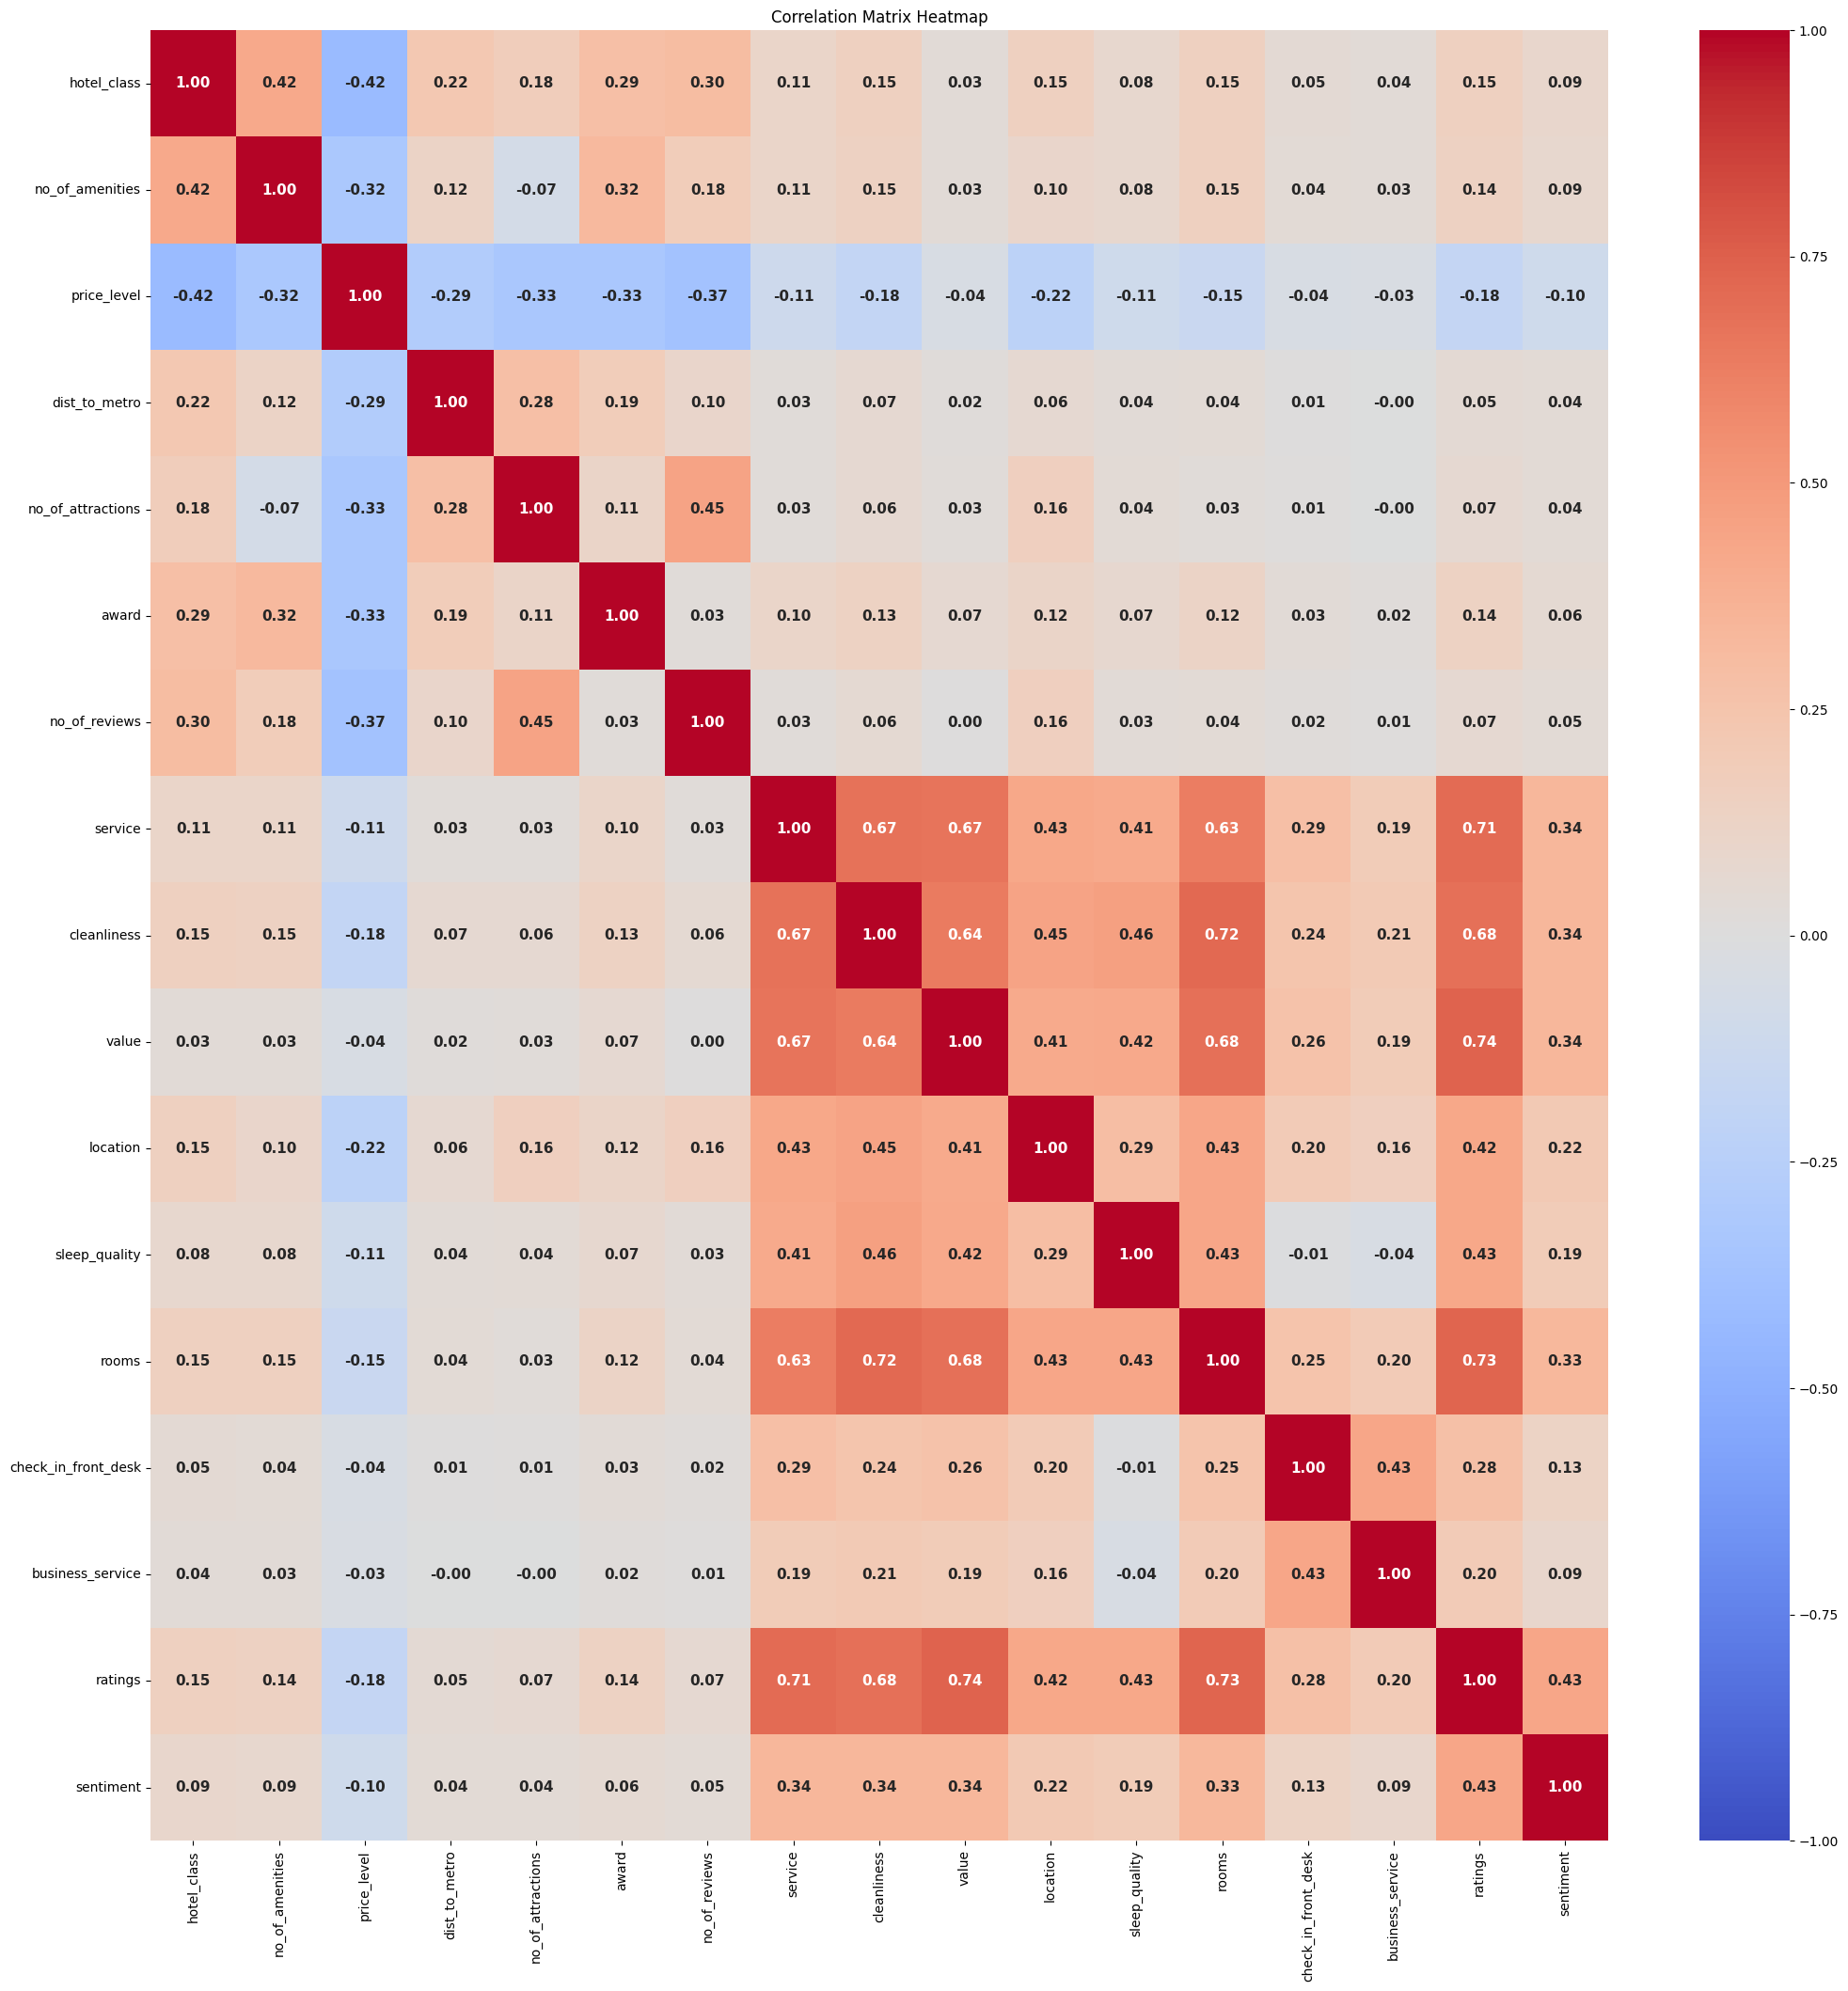

In [15]:
#Creating the heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
fig, ax = plt.subplots(figsize = (25,25))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt='.2f',
vmin = -1, vmax = 1, annot_kws={'fontsize':11, 'fontweight':'bold'})
plt.title("Correlation Matrix Heatmap")
plt.show()